In [0]:
print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train["Total phenols"], ax=ax1)
sns.kdeplot(X_train["Flavanoids"], ax=ax1)
sns.kdeplot(X_train["Hue"], ax=ax1)
sns.kdeplot(X_train["OD280/OD315 of diluted wines"], ax=ax1)
sns.kdeplot(X_train["Proline"], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled["Total phenols"], ax=ax2)
sns.kdeplot(X_train_scaled["Flavanoids"], ax=ax2)
sns.kdeplot(X_train_scaled["Hue"], ax=ax2)
sns.kdeplot(X_train_scaled["OD280/OD315 of diluted wines"], ax=ax2)
sns.kdeplot(X_train_scaled["Proline"], ax=ax2)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc


print('Accuracy:', accuracy_score(y_test, y_knn))
print('Precision(micro):', precision_score(y_test, y_knn, average='micro'))
print('Precision(weighted):', precision_score(y_test, y_knn, average='weighted'))
print('Recall(micro):', recall_score(y_test, y_knn, average='micro'))
print('Recall(weighted):', recall_score(y_test, y_knn, average='weighted'))
#print('ROC AUC:', roc_auc_score(y_test, y_knn, average='samples'))
#pr, rec, _ = precision_recall_curve(y_test, y_knn)
#print('PRC AUC:', auc(rec, pr))
print('F1(micro):', f1_score(y_test, y_knn, average='micro'))
print('F1(weighted):', f1_score(y_test, y_knn, average='weighted'))
print('F0.5:', fbeta_score(y_test, y_knn, 0.5, average='micro'))
print('F0.5:', fbeta_score(y_test, y_knn, 0.5, average='weighted'))
print('F2:', fbeta_score(y_test, y_knn, 2, average='micro'))
print('F2:', fbeta_score(y_test, y_knn, 2, average='weighted'))

Accuracy: 0.37777777777777777
Precision(micro): 0.37777777777777777
Precision(weighted): 0.3812908496732026
Recall(micro): 0.37777777777777777
Recall(weighted): 0.37777777777777777
F1(micro): 0.37777777777777777
F1(weighted): 0.37927291346646186
F0.5: 0.37777777777777777
F0.5: 0.3804206325843064
F2: 0.37777777777777777
F2: 0.37831329259478286


In [58]:
n_neighbors = 15 #количество соседей
weights = "uniform"


knn = neighbors.KNeighborsClassifier(n_neighbors, weights) #создание модели
knn.fit(X_train, y_train) #обучение модели
y_knn = knn.predict(X_test)
y_knn = np.around(y_knn, decimals = 0).astype(np.int64)

scores = cross_val_score(knn, X_test, y_test) #кросс-валидация
    
#Выводы результатов и метрик
print("Weights = %s" % (weights))
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (scores.mean() * 100, scores.std() * 2 * 100))
print(classification_report(y_test, y_knn, target_names = ['class 0', 'class 1', 'class 2']))

Weights = uniform
Accuracy: 88.89% (+/- 22.66%)
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        15
    class 1       1.00      1.00      1.00        18
    class 2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



**Лабораторная работа №2**

*Задача: провести визуальный анализ данных*

Импортируем нужные нам библиотеки, скачаем данные и разделим их на тестовые и тренировочные

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
data.info()

X = data[data.columns[1:]]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


Проверим какие признаки имееют наибольшую корреляцию с целевой переменной

In [42]:
correlations_data = data.corr()['Class'].sort_values()
print(correlations_data)

Flavanoids                     -0.847498
OD280/OD315 of diluted wines   -0.788230
Total phenols                  -0.719163
Proline                        -0.633717
Hue                            -0.617369
Proanthocyanins                -0.499130
Alcohol                        -0.328222
Magnesium                      -0.209179
Ash                            -0.049643
Color intensity                 0.265668
Malic acid                      0.437776
Nonflavanoid phenols            0.489109
Alcalinity of ash               0.517859
Class                           1.000000
Name: Class, dtype: float64


Отсечем признаки которые имеют коэффициент корреляции меньше, чем 0.6

In [0]:
data = data.drop(['Proanthocyanins', 'Alcohol', 'Magnesium', 'Ash', 'Color intensity', 'Malic acid', 'Nonflavanoid phenols', 'Alcalinity of ash'], axis='columns')

Проведем визуальный анализ наших данных

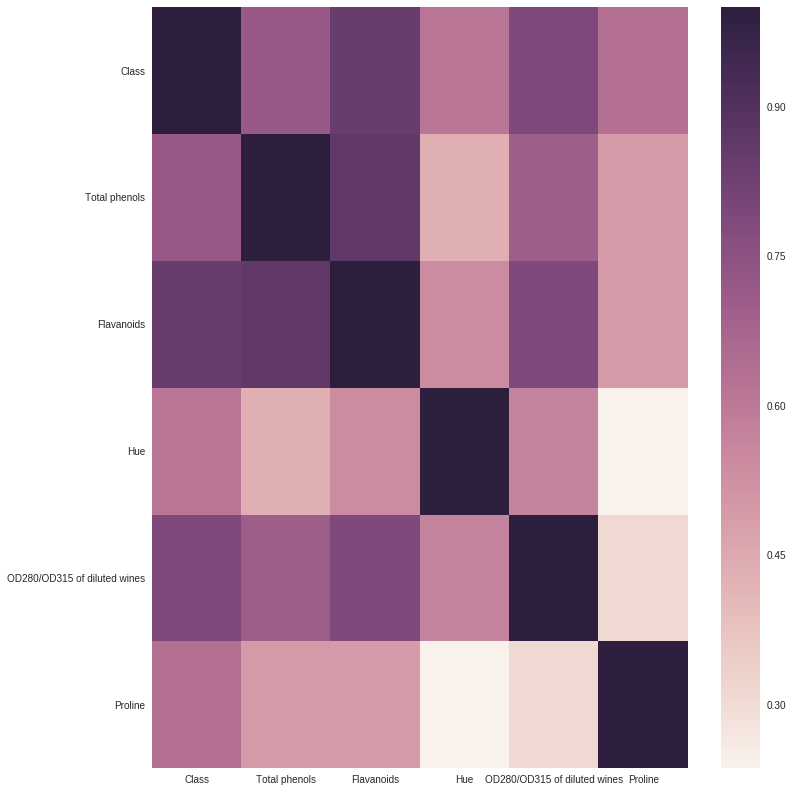

In [44]:
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


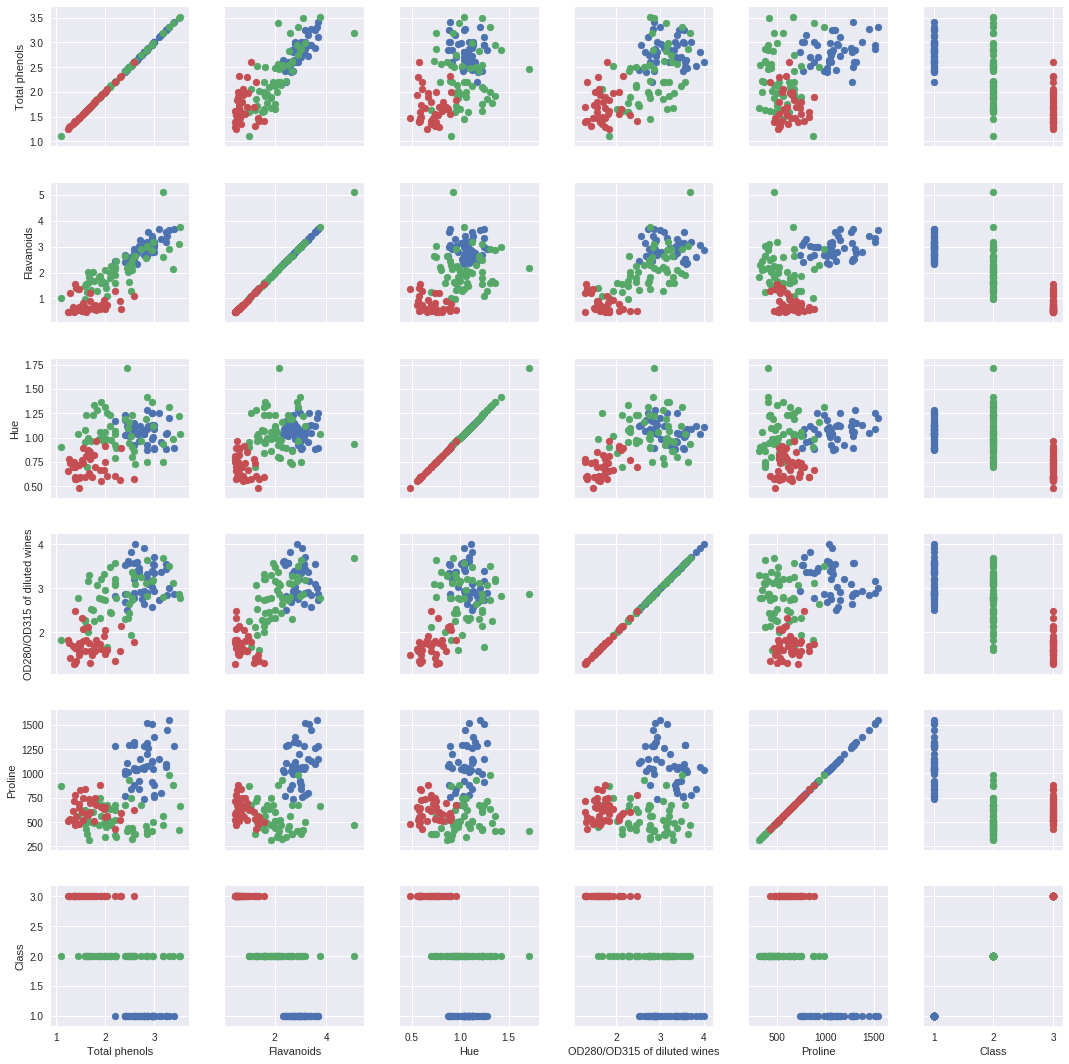

In [45]:
df_for_pairgrid = X_train[["Total phenols","Flavanoids","Hue","OD280/OD315 of diluted wines","Proline"]]
df_for_pairgrid['Class'] = y_train

sns.PairGrid(df_for_pairgrid, hue='Class').map(plt.scatter)

Из этих двух графиков можно сделать вывод, что теперь у нас остались признаки которые имееют определяющие значение в выборе класса.

*Задача: посчитать "руками" (не используя sklearn.metrics) accuracy, precision, recall и f1 для ответов, полученных на предыдущей лабе.*

Загружаем данные предыдущей лабы